# EDA and Data Visualizations 

_by Anna Funsten_

### Contents:
 - [Exploring Data on CDC Website Related to Asthma](#Exploring_Data_on_CDC_Website_Related_to_Asthma)
    - [Find the US Cities with Highest Number of Adults with Asthma in 2017](#Find_the_US_Cities_with_Highest_Number_of_Adults_with_Asthma_in_2017)
 - [EDA of AQI and Temperature Data](#EDA_of_AQI_and_Temperature_Data)
     - [Heatmap](#Heatmap)
     - [Pairplot](#Pairplot)
     - [Visualizations Exploring Temperature and Pollutants](#Visualizations_Exploring_Temperature_and_Pollutants_)
     - [Visualization Exploring Cumulative AQI Regarding Time](#_Visualization_Exploring_Cumulative_AQI_Regarding_Time)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploring Data on CDC Website Related to Asthma
[(back to top)](#EDA_and_Data_Visualizations)

In [2]:
df_asthma = pd.read_csv('../data/500_Cities__Current_asthma_among_adults_aged___18_years.csv')

In [3]:
df_asthma.head(2).T

,0,1
Year,2017,2017
StateAbbr,CA,CA
StateDesc,California,California
CityName,Livermore,Compton
GeographicLevel,City,City
DataSource,BRFSS,BRFSS
Category,Health Outcomes,Health Outcomes
UniqueID,0641992,0615044
Measure,Current asthma among adults aged >=18 Years,Current asthma among adults aged >=18 Years
Data_Value_Unit,%,%


### Find the US Cities with Highest Number of Adults with Asthma in 2017
[(back to top)](#EDA_and_Data_Visualizations)

In [4]:
top_10 = df_asthma['Data_Value'].sort_values(ascending = False)[:10]
top_10

20727    17.8
15169    17.5
21445    17.5
14231    17.4
14542    17.4
21108    17.3
21117    17.2
21197    17.1
41       17.0
27633    17.0
Name: Data_Value, dtype: float64

In [5]:
mask = df_asthma['Data_Value'] > 17 
# finding all cities with asthma rates higher than 17

In [6]:
high_asthma_rate_df = df_asthma[mask].sort_values(by = 'Data_Value', ascending = True)

In [7]:
high_asthma_rate_df = high_asthma_rate_df[['StateAbbr','CityName','Data_Value']]

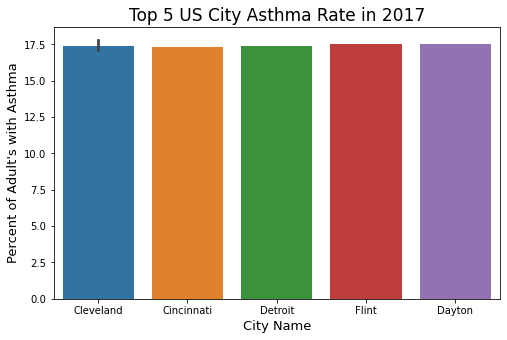

In [8]:
plt.figure(figsize = (8,5))
plt.title('Top 5 US City Asthma Rate in 2017',fontsize = 17)
sns.barplot(data = high_asthma_rate_df, x = 'CityName', y = 'Data_Value');
plt.xlabel('City Name', fontsize = 13)
plt.ylabel("Percent of Adult's with Asthma", fontsize = 13);

Cleveland with the highest US asthma rate for adults older than 18 years old based on CDC data from 2017. 17.5% of all adults in Cleveland have Asthma. Seeing that Cleveland had a high asthma rate narrowed allowed us to narrow in on one city to look at air quality  

## EDA of AQI and Temperature Data 
[(back to top)](#EDA_and_Data_Visualizations)

In [9]:
df = pd.read_csv('../data/cleaned_aqi_and_temp_data_2017-2019.csv')

In [10]:
df.head()

,date,co_max,co_aqi_val,no2_max,no2_aqi_val,ozone_max,ozone_aqi_val,pm10_mean,pm10_aqi_val,pm2.5_mean,pm2.5_aqi_val,so2_max,so2_aqi_val,cumulative_aqi,temp_high,temp_low,temp_avg,pct_change_aqi,month,weekday
0,2017-01-01,0.5,6.0,36.0,34.0,0.026,24.0,21.0,19.0,9.6,40.0,5.0,7.0,40.0,43,27,35.0,NaN,1,6
1,2017-01-02,0.5,6.0,33.0,31.0,0.009,8.0,18.0,17.0,14.1,55.0,2.0,3.0,55.0,50,34,42.0,0.375000,1,0
2,2017-01-03,0.4,5.0,24.0,23.0,0.015,14.0,9.0,8.0,7.7,32.0,0.0,0.0,32.0,50,40,45.0,-0.418182,1,1
3,2017-01-04,0.2,2.0,NaN,NaN,0.027,25.0,19.0,18.0,4.6,19.0,0.0,0.0,25.0,40,20,30.0,-0.218750,1,2
4,2017-01-05,NaN,NaN,19.0,18.0,0.020,19.0,11.0,10.0,5.3,22.0,0.0,0.0,22.0,21,13,17.0,-0.120000,1,3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1093 non-null   object 
 1   co_max          1062 non-null   float64
 2   co_aqi_val      1062 non-null   float64
 3   no2_max         1038 non-null   float64
 4   no2_aqi_val     1038 non-null   float64
 5   ozone_max       1057 non-null   float64
 6   ozone_aqi_val   1057 non-null   float64
 7   pm10_mean       1050 non-null   float64
 8   pm10_aqi_val    1050 non-null   float64
 9   pm2.5_mean      980 non-null    float64
 10  pm2.5_aqi_val   980 non-null    float64
 11  so2_max         1073 non-null   float64
 12  so2_aqi_val     1073 non-null   float64
 13  cumulative_aqi  1093 non-null   float64
 14  temp_high       1093 non-null   int64  
 15  temp_low        1093 non-null   int64  
 16  temp_avg        1093 non-null   float64
 17  pct_change_aqi  1092 non-null   f

In [12]:
df["weekday"] = df["weekday"].astype("category")

In [13]:
df["month"] = df["month"].astype("category")

In [14]:
df['date'] = pd.to_datetime(df['date'])

In [15]:
df.drop('pct_change_aqi', axis = 1, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1093 non-null   datetime64[ns]
 1   co_max          1062 non-null   float64       
 2   co_aqi_val      1062 non-null   float64       
 3   no2_max         1038 non-null   float64       
 4   no2_aqi_val     1038 non-null   float64       
 5   ozone_max       1057 non-null   float64       
 6   ozone_aqi_val   1057 non-null   float64       
 7   pm10_mean       1050 non-null   float64       
 8   pm10_aqi_val    1050 non-null   float64       
 9   pm2.5_mean      980 non-null    float64       
 10  pm2.5_aqi_val   980 non-null    float64       
 11  so2_max         1073 non-null   float64       
 12  so2_aqi_val     1073 non-null   float64       
 13  cumulative_aqi  1093 non-null   float64       
 14  temp_high       1093 non-null   int64         
 15  temp

In [17]:
df.set_index('date', inplace = True)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
co_max,1062.0,0.357910,0.147325,0.100,0.300,0.300,0.400,1.50
co_aqi_val,1062.0,4.029190,1.893014,1.000,3.000,3.000,5.000,17.00
no2_max,1038.0,22.685934,10.500660,3.000,14.000,22.000,30.000,74.00
no2_aqi_val,1038.0,21.379576,9.958179,3.000,13.000,21.000,28.000,72.00
ozone_max,1057.0,0.034501,0.010981,0.002,0.027,0.034,0.041,0.07
ozone_aqi_val,1057.0,32.438978,11.898494,2.000,25.000,31.000,38.000,100.00
pm10_mean,1050.0,22.309524,13.789180,3.000,12.000,18.000,29.000,91.00
pm10_aqi_val,1050.0,20.528571,12.447703,3.000,11.000,17.000,27.000,69.00
pm2.5_mean,980.0,9.521735,5.730249,-2.900,5.100,8.750,12.600,34.30
pm2.5_aqi_val,980.0,37.246939,19.001592,0.000,21.000,36.500,52.000,98.00


Mean of cumulative AQI is 43.040256 showing that on average the levels are not in dangerous zones but are near the moderate zone. The max is 115 which is considered unhealthy for sensitive groups and 50% of the daily cumulative AQI data is between 32 and 52 showing that 50% of the cumulative daily readings are nearing the moderate zone. 

In [19]:
df.isna().sum()

co_max             31
co_aqi_val         31
no2_max            55
no2_aqi_val        55
ozone_max          36
ozone_aqi_val      36
pm10_mean          43
pm10_aqi_val       43
pm2.5_mean        113
pm2.5_aqi_val     113
so2_max            20
so2_aqi_val        20
cumulative_aqi      0
temp_high           0
temp_low            0
temp_avg            0
month               0
weekday             0
dtype: int64

### Heatmap
[(back to top)](#EDA_and_Data_Visualizations)

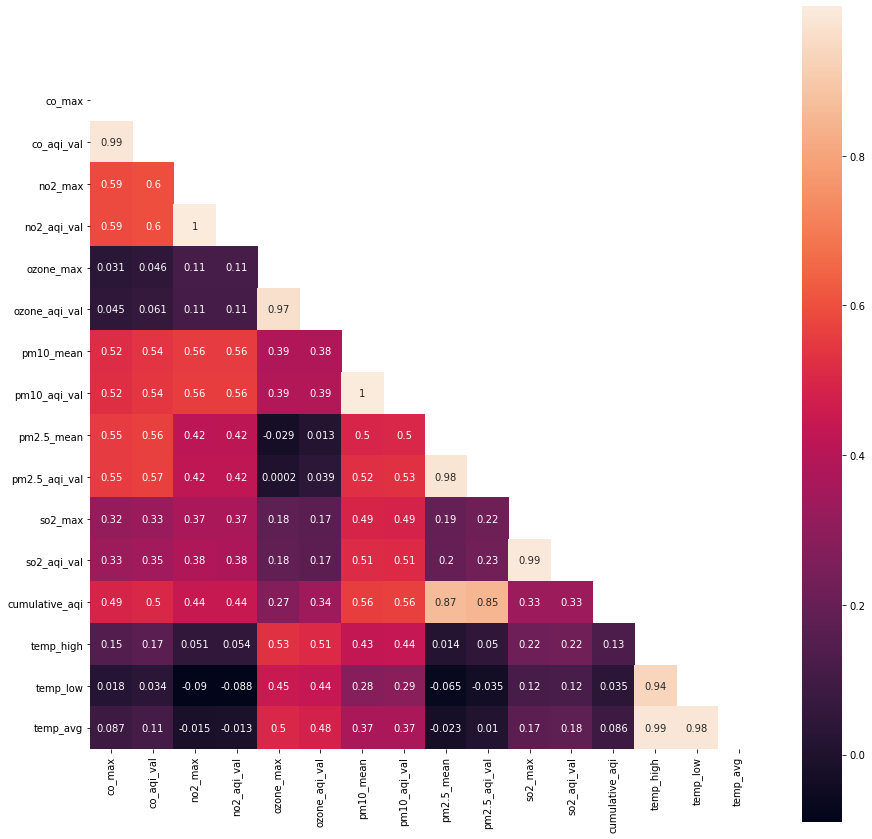

In [20]:
plt.figure(figsize=(15,15)) 
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot = True, mask = mask, square = True);

##### Correlation

- pm 2.5 mean and pm 2.5 aqi are highly correlated with cumulative aqi

- there is multicolinearity seen between aqi readings and pollutant measurement values which is to be expected since the aqi values are scored based from the pollutant measurement

- there is also multicolinearity between temperature values which is to expected has well since when we have lower average temperature then the low temperature of the day and the high temperature of the day will all be related. 

### Pairplot
[(back to top)](#EDA_and_Data_Visualizations)

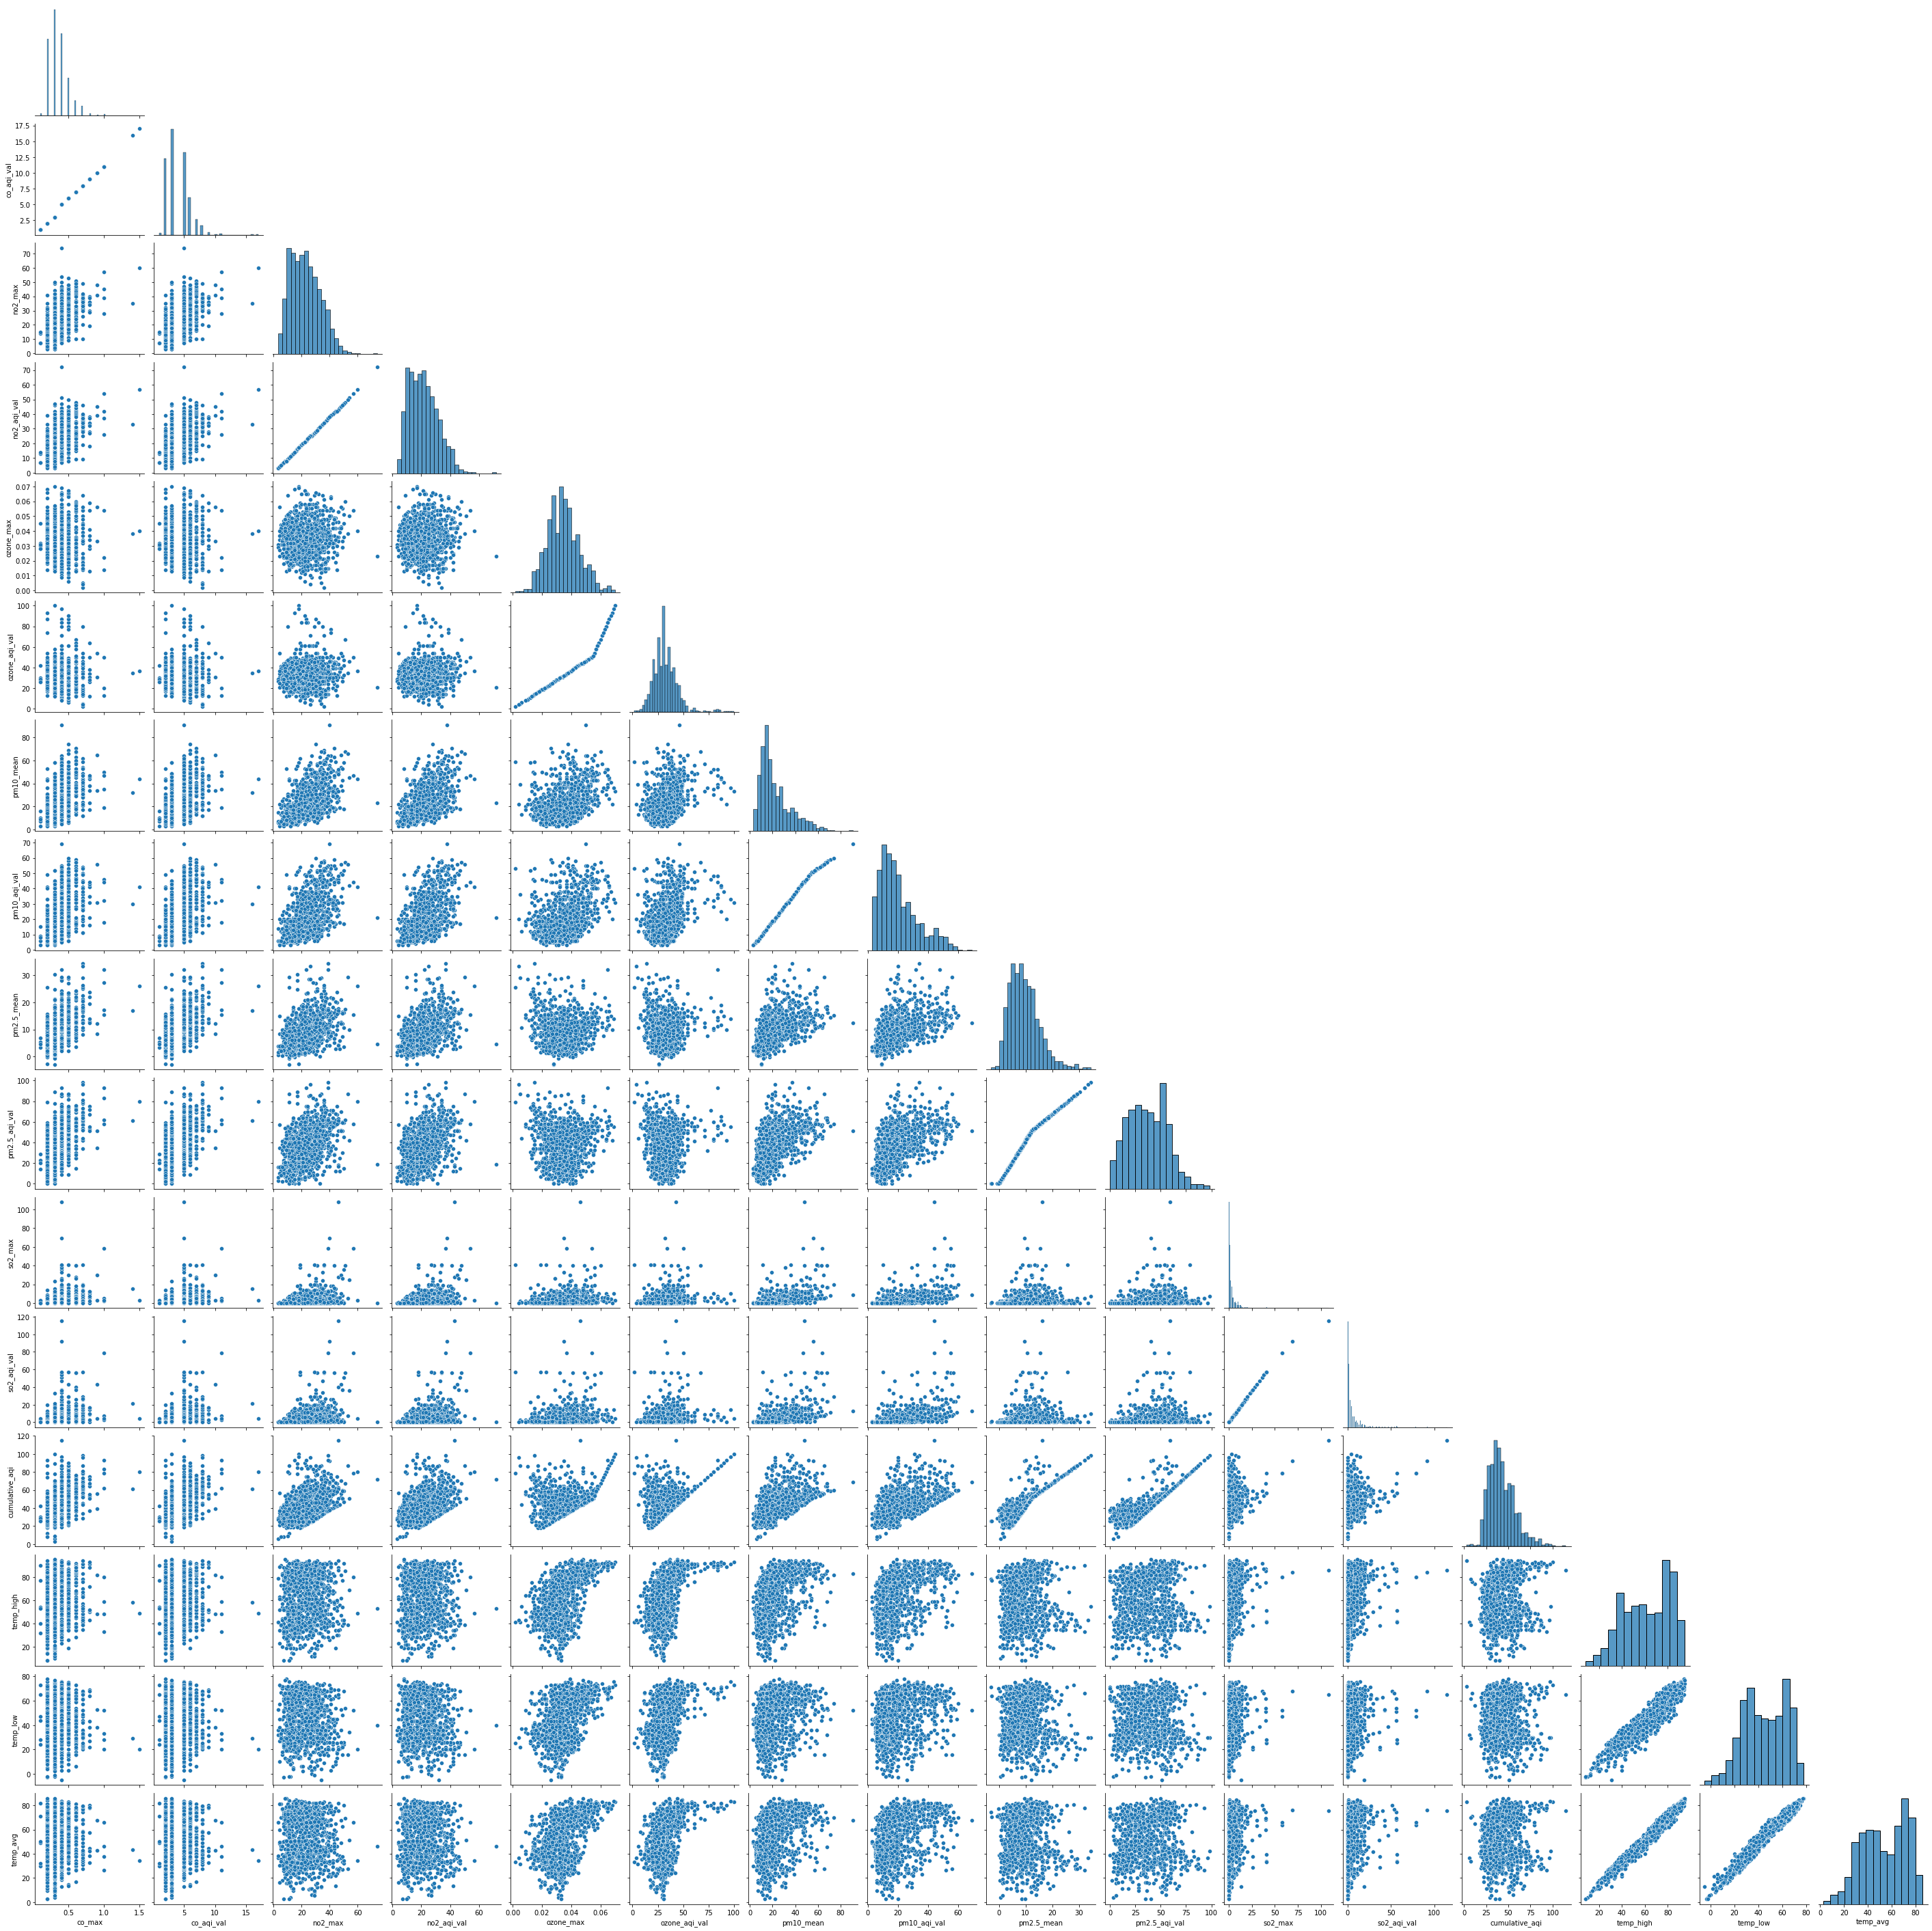

In [21]:
sns.pairplot(data = df, corner = True)

### Visualizations Exploring Temperature and Pollutants 
[(back to top)](#EDA_and_Data_Visualizations)

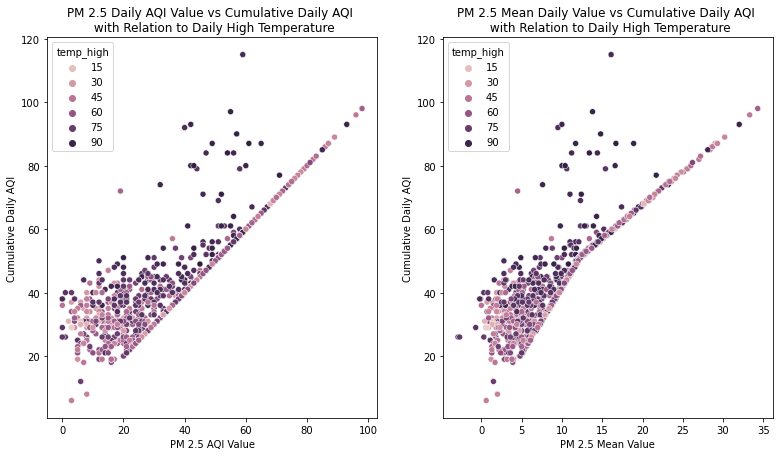

In [22]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(13,7))

sns.scatterplot(x = 'pm2.5_aqi_val', y = 'cumulative_aqi' , hue = 'temp_high', data = df, ax=ax[0]).set(
    title="PM 2.5 Daily AQI Value vs Cumulative Daily AQI \n with Relation to Daily High Temperature",
    xlabel='PM 2.5 AQI Value', 
    ylabel='Cumulative Daily AQI')


sns.scatterplot(x = 'pm2.5_mean', y = 'cumulative_aqi' , hue = 'temp_high', data = df, ax=ax[1]).set(
    title="PM 2.5 Mean Daily Value vs Cumulative Daily AQI \n with Relation to Daily High Temperature", 
    xlabel='PM 2.5 Mean Value', 
    ylabel='Cumulative Daily AQI', 
    label = 'High Temp');


This graphs shows that at times there is a direct correlation with cumulative daily aqi and pm 2.5 daily aqi value showing that on these days pm 2.5 is usually the highest pollutant aqi value on that day. This shows that pm 2.5 has a strong relationship with influencing total AQI value. We can also see as temperature is getting warmer there is a slight association with increase AQI and very high temperatures.

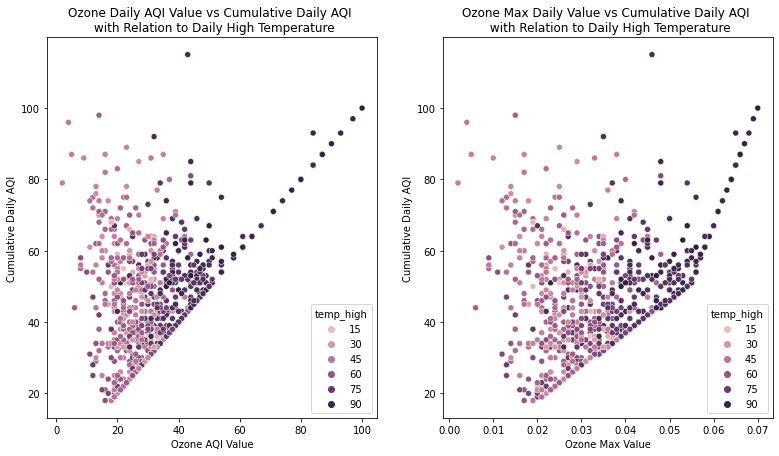

In [23]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(13,7))

sns.scatterplot(x = 'ozone_aqi_val', y = 'cumulative_aqi' , hue = 'temp_high', data = df, ax=ax[0]).set(
    title="Ozone Daily AQI Value vs Cumulative Daily AQI \n with Relation to Daily High Temperature", 
    xlabel='Ozone AQI Value', 
    ylabel='Cumulative Daily AQI')


sns.scatterplot(x = 'ozone_max', y = 'cumulative_aqi' , hue = 'temp_high', data = df, ax=ax[1]).set(
    title="Ozone Max Daily Value vs Cumulative Daily AQI \n with Relation to Daily High Temperature",
    xlabel='Ozone Max Value', 
    ylabel='Cumulative Daily AQI', 
    label = 'High Temp');


We can also see a relationship between cumulative Daily AQI and Ozone AQI readings. As Ozone readings get to very high values, they are more likely to be the highest daily AQI reading compared to other pollutants. There is also a relationship with increasing temperature and higher AQI/ Ozone AQI and values. 

### Visualization Exploring Cumulative AQI Regarding Time
[(back to top)](#EDA_and_Data_Visualizations)

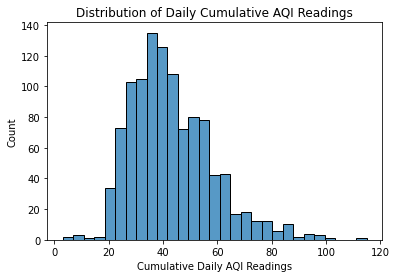

In [24]:
sns.histplot(x = 'cumulative_aqi', data = df).set(
    title="Distribution of Daily Cumulative AQI Readings",
    xlabel='Cumulative Daily AQI Readings');

We can see that most the  daily AQI values are around 40 and the distribution is skewed to the right indicating that the are fewer dangerous level but there are still daily levels reaching past 100 

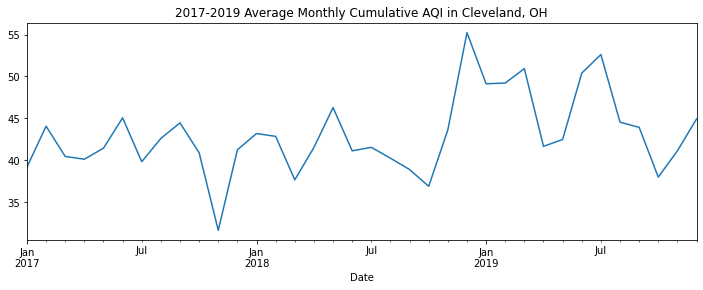

In [25]:
df['cumulative_aqi'].resample('m').mean().plot(figsize=(12, 4), title='2017-2019 Average Monthly Cumulative AQI in Cleveland, OH');
plt.xlabel('Date', fontsize = 10);

From the above chart, we can see that there was a low average monthly AQI level in Nov 2017. There was another low averaye monthly AQI in Oct 2018 and Oct 2019. However, there are spikes in average monthly AQI in May 2018, Dec 2018, and July 2019.

In [26]:
high_mask = df['temp_avg'] > 75

high_temp_df = df[high_mask]

low_mask = df['temp_avg'] < 75

low_temp_df = df[low_mask]

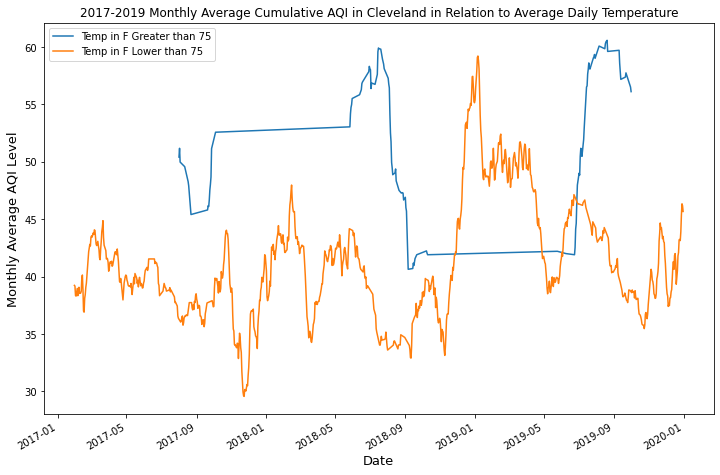

In [27]:
plt.figure(figsize=(12,8))
plt.title('2017-2019 Monthly Average Cumulative AQI in Cleveland in Relation to Average Daily Temperature')
high_temp_df['cumulative_aqi'].rolling(window=30).mean().plot(label = "Temp in F Greater than 75");
low_temp_df['cumulative_aqi'].rolling(window=30).mean().plot(label = "Temp in F Lower than 75");
plt.legend(loc='best');
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Monthly Average AQI Level', fontsize = 13);

From this chart, we can see that there usually higher temperature is associated with higher average AQI readings. However between 1-2019 and 5-2019 lower average temperatures were associated with higher AQI readings. 

In [28]:
df_2017 = df.loc['2017']

In [29]:
df_2018 = df.loc['2018']

In [30]:
df_2019 = df.loc['2019']

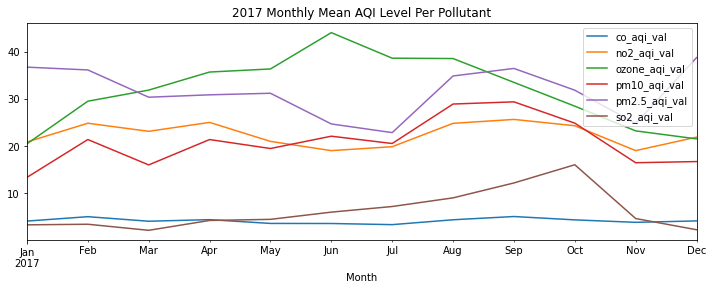

In [31]:
df_2017[['co_aqi_val','no2_aqi_val', 
         'ozone_aqi_val', 'pm10_aqi_val', 
         'pm2.5_aqi_val', 
         'so2_aqi_val' ]].resample('m').mean().plot(figsize=(12, 4), 
            title = '2017 Monthly Mean AQI Level Per Pollutant', xlabel = 'Month');

The above chart shows for 2017 ozone AQI levels were the highest consitently over the year compared to other pollutants

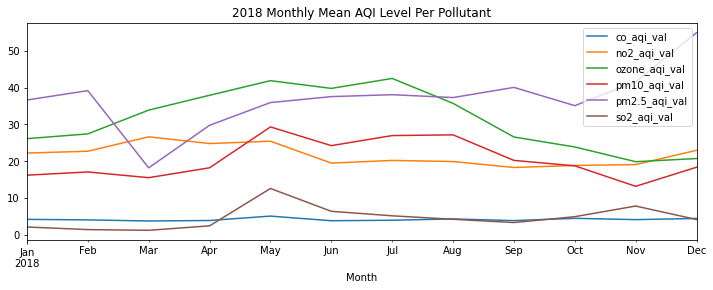

In [32]:
df_2018[['co_aqi_val','no2_aqi_val', 'ozone_aqi_val', 
         'pm10_aqi_val', 'pm2.5_aqi_val', 
         'so2_aqi_val' ]].resample('m').mean().plot(figsize=(12, 4), title = '2018 Monthly Mean AQI Level Per Pollutant', xlabel = 'Month');

The above chart shows that ozone and pm 2.5 showed the highest average monthly AQI readings over 2018

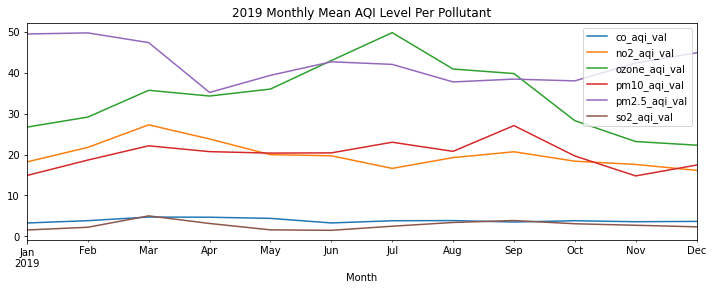

In [33]:
df_2019[['co_aqi_val','no2_aqi_val', 'ozone_aqi_val', 'pm10_aqi_val', 'pm2.5_aqi_val', 'so2_aqi_val' ]].resample('m').mean().plot(figsize=(12, 4), title = '2019 Monthly Mean AQI Level Per Pollutant', xlabel = 'Month');

The above chart shows that we are noticing even more prevalence of pm 2.5 reaching highest monthly average AQI levels. Ozone also reaching high average monthly AQI levels compared to other pollutants. 

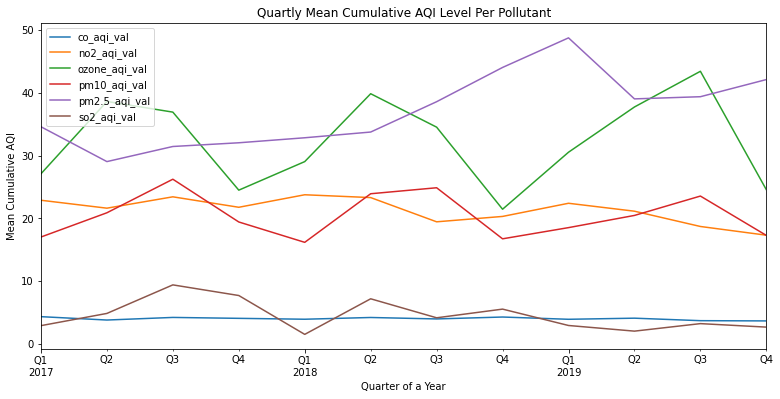

In [34]:
df[['co_aqi_val','no2_aqi_val', 
         'ozone_aqi_val', 'pm10_aqi_val', 
         'pm2.5_aqi_val', 
         'so2_aqi_val']].resample('q').mean().plot(figsize=(13, 6), 
            title = 'Quartly Mean Cumulative AQI Level Per Pollutant', xlabel = 'Quarter of a Year', ylabel = 'Mean Cumulative AQI');

pm 2.5 AQI and ozone aqi consistently show strong relationship to high overall AQI readings.

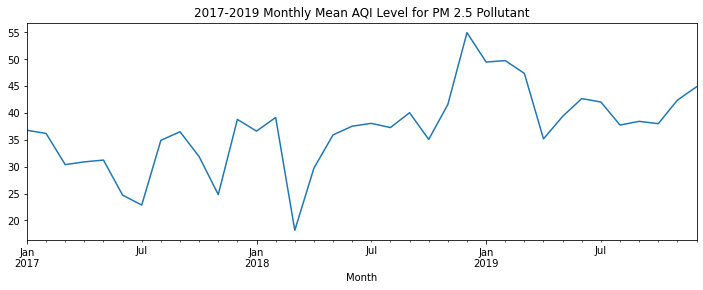

In [35]:
df['pm2.5_aqi_val'].resample('m').mean().plot(figsize=(12, 4), 
            title = '2017-2019 Monthly Mean AQI Level for PM 2.5 Pollutant', xlabel = 'Month');

From the above graph we can see that as the years progress, PM 2.5 AQI levels are increasing